In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Filter out only the classes for cats and dogs
cat_dog_classes = [3, 5]  # 3: cat, 5: dog
train_filter = np.isin(y_train, cat_dog_classes).flatten()
test_filter = np.isin(y_test, cat_dog_classes).flatten()

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Convert class labels to binary (0: cat, 1: dog)
y_train = np.where(y_train == 3, 0, 1)
y_test = np.where(y_test == 3, 0, 1)

# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


170498071/170498071 [==============================] - 5s 0us/step


In [3]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)


In [4]:
# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) // 32,
                    epochs=20,
                    validation_data=(x_test, y_test))


Epoch 1/20
312/312 [==============================] - 18s 25ms/step - loss: 0.6905 - accuracy: 0.5361 - val_loss: 0.6751 - val_accuracy: 0.5715
Epoch 2/20
312/312 [==============================] - 6s 20ms/step - loss: 0.6771 - accuracy: 0.5740 - val_loss: 0.6494 - val_accuracy: 0.6255
Epoch 3/20
312/312 [==============================] - 6s 20ms/step - loss: 0.6621 - accuracy: 0.5996 - val_loss: 0.6375 - val_accuracy: 0.6395
Epoch 4/20
312/312 [==============================] - 6s 19ms/step - loss: 0.6519 - accuracy: 0.6185 - val_loss: 0.6035 - val_accuracy: 0.6645
Epoch 5/20
312/312 [==============================] - 7s 23ms/step - loss: 0.6312 - accuracy: 0.6451 - val_loss: 0.5950 - val_accuracy: 0.6870
Epoch 6/20
312/312 [==============================] - 6s 19ms/step - loss: 0.6158 - accuracy: 0.6620 - val_loss: 0.5876 - val_accuracy: 0.6765
Epoch 7/20
312/312 [==============================] - 7s 23ms/step - loss: 0.6024 - accuracy: 0.6672 - val_loss: 0.5687 - val_accuracy: 0.695

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')


63/63 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7590
Test accuracy: 0.76


1/1 [==============================] - 1s 608ms/step


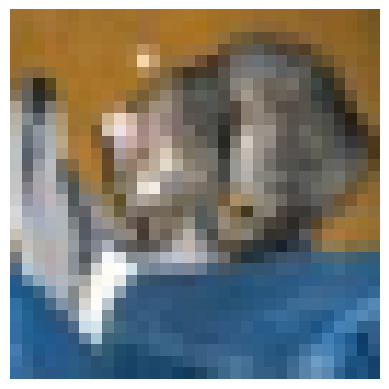

Prediction: cat with probability 0.69


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Select an image from the test set (e.g., the first image)
image_index = 0
image = x_test[image_index]

# Reshape the image to add the batch dimension
image = np.expand_dims(image, axis=0)

# Make a prediction
prediction = model.predict(image)

# Get the predicted class (0 for cat, 1 for dog)
predicted_class = int(prediction[0][0] > 0.5)

# Get the probability of the predicted class
probability = prediction[0][0] if predicted_class == 1 else 1 - prediction[0][0]

# Display the image
plt.imshow(x_test[image_index])
plt.axis('off')
plt.show()

# Print the prediction
class_names = ['cat', 'dog']
print(f"Prediction: {class_names[predicted_class]} with probability {probability:.2f}")

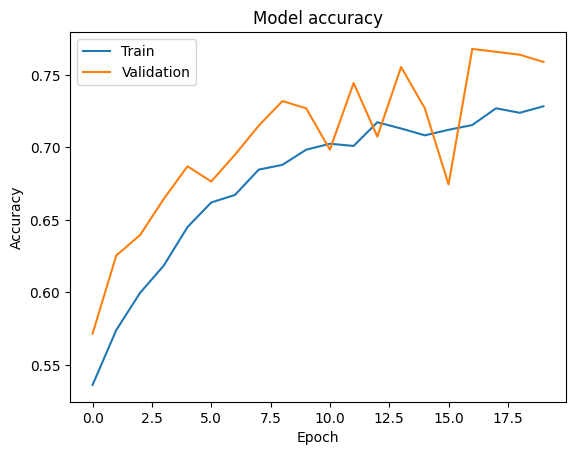

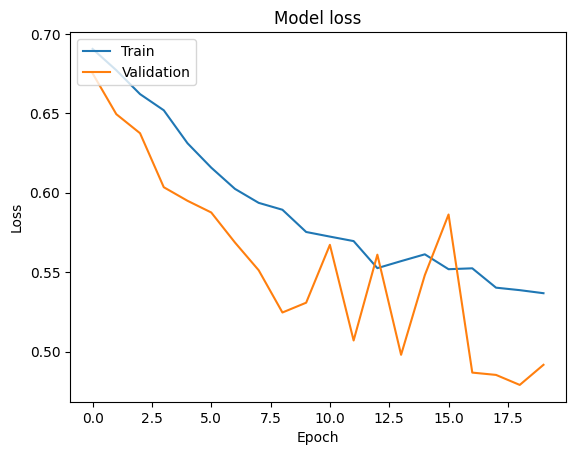

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) // 32,
                    epochs=20,
                    validation_data=(x_test, y_test))

# Call predict on the model
_ = model.predict(x_test[:1])

# Try accessing the input layer directly
input_layer = model.layers[0].input

layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=input_layer, outputs=layer_outputs)



Epoch 1/20
312/312 [==============================] - 6s 20ms/step - loss: 0.5359 - accuracy: 0.7306 - val_loss: 0.4815 - val_accuracy: 0.7665
Epoch 2/20
312/312 [==============================] - 7s 23ms/step - loss: 0.5293 - accuracy: 0.7302 - val_loss: 0.5137 - val_accuracy: 0.7520
Epoch 3/20
312/312 [==============================] - 6s 21ms/step - loss: 0.5243 - accuracy: 0.7411 - val_loss: 0.4730 - val_accuracy: 0.7765
Epoch 4/20
312/312 [==============================] - 7s 22ms/step - loss: 0.5262 - accuracy: 0.7363 - val_loss: 0.4700 - val_accuracy: 0.7760
Epoch 5/20
312/312 [==============================] - 7s 21ms/step - loss: 0.5231 - accuracy: 0.7393 - val_loss: 0.4786 - val_accuracy: 0.7775
Epoch 6/20
312/312 [==============================] - 7s 23ms/step - loss: 0.5204 - accuracy: 0.7372 - val_loss: 0.4701 - val_accuracy: 0.7770
Epoch 7/20
312/312 [==============================] - 7s 23ms/step - loss: 0.5212 - accuracy: 0.7393 - val_loss: 0.4555 - val_accuracy: 0.7880

Visualizing layer 1
1/1 [==============================] - 0s 107ms/step


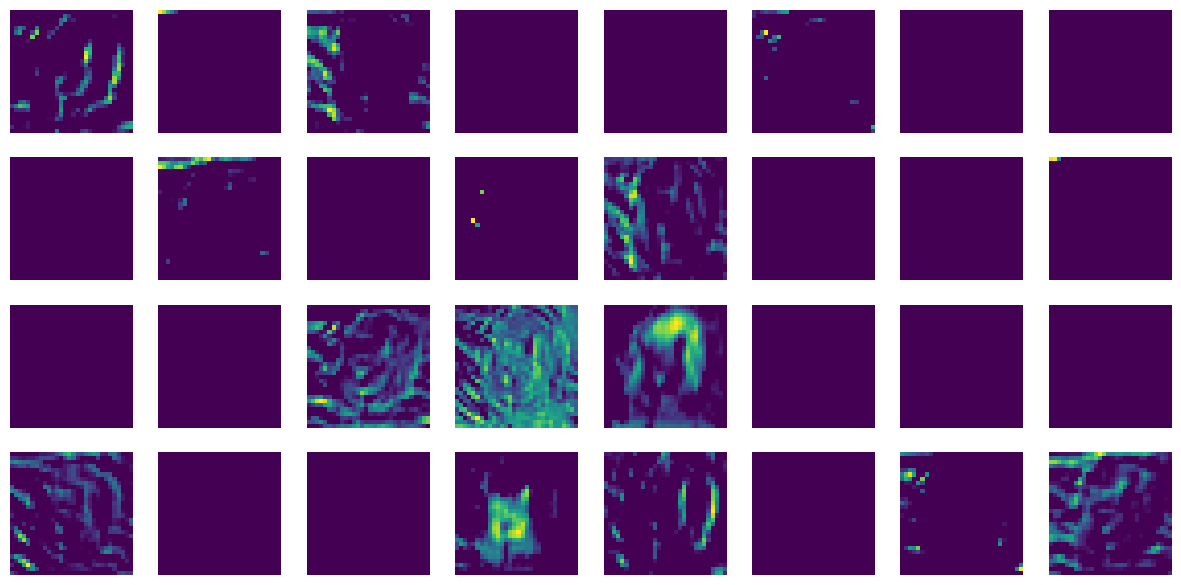

Visualizing layer 2
1/1 [==============================] - 0s 18ms/step


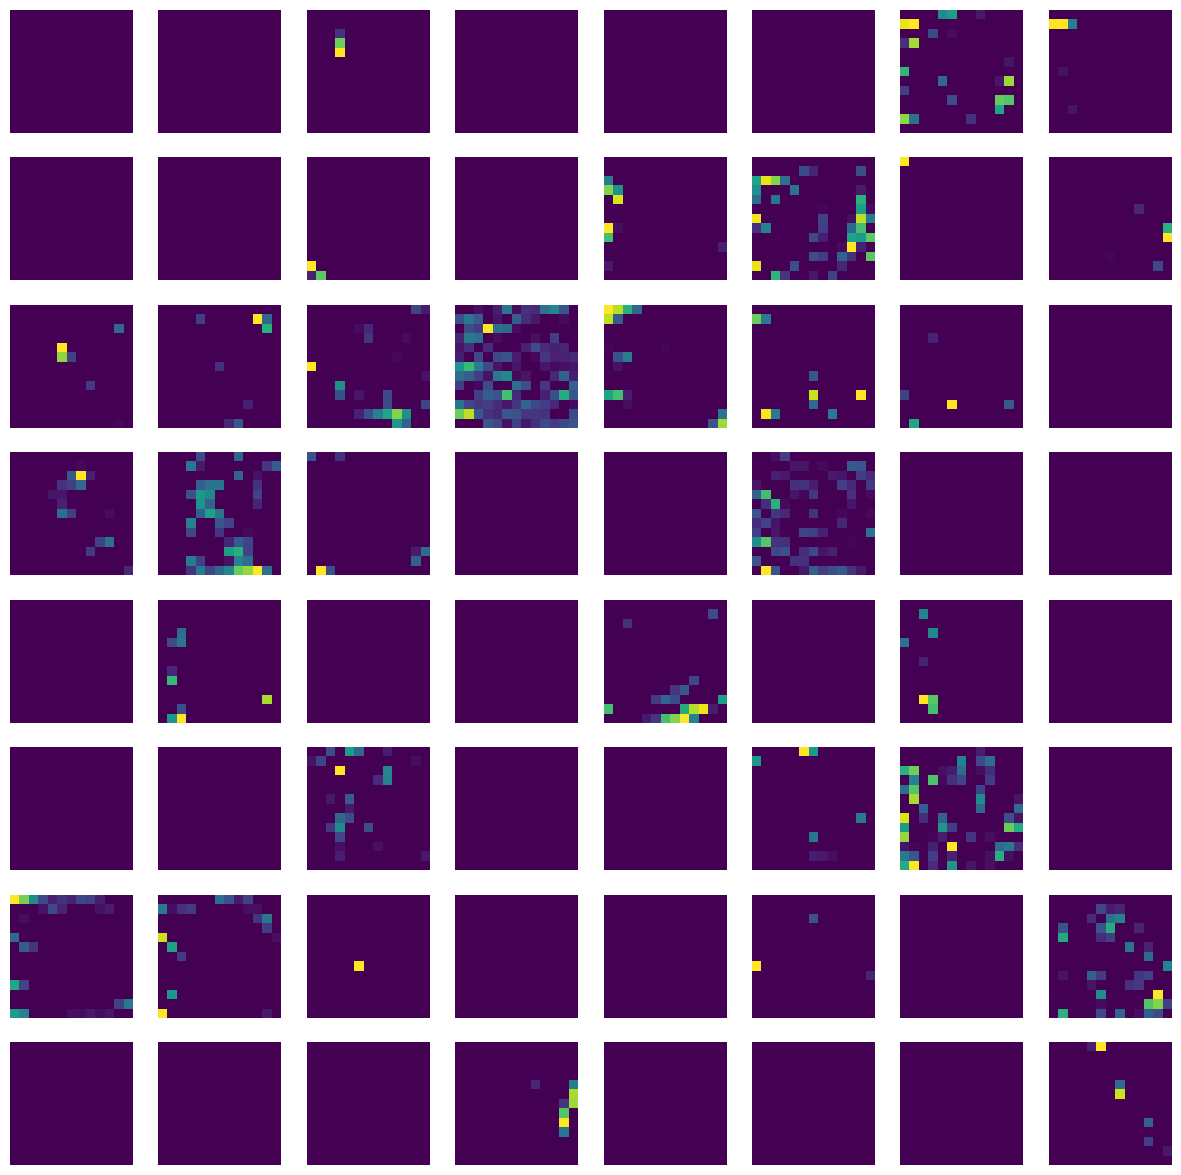

Visualizing layer 3
1/1 [==============================] - 0s 27ms/step


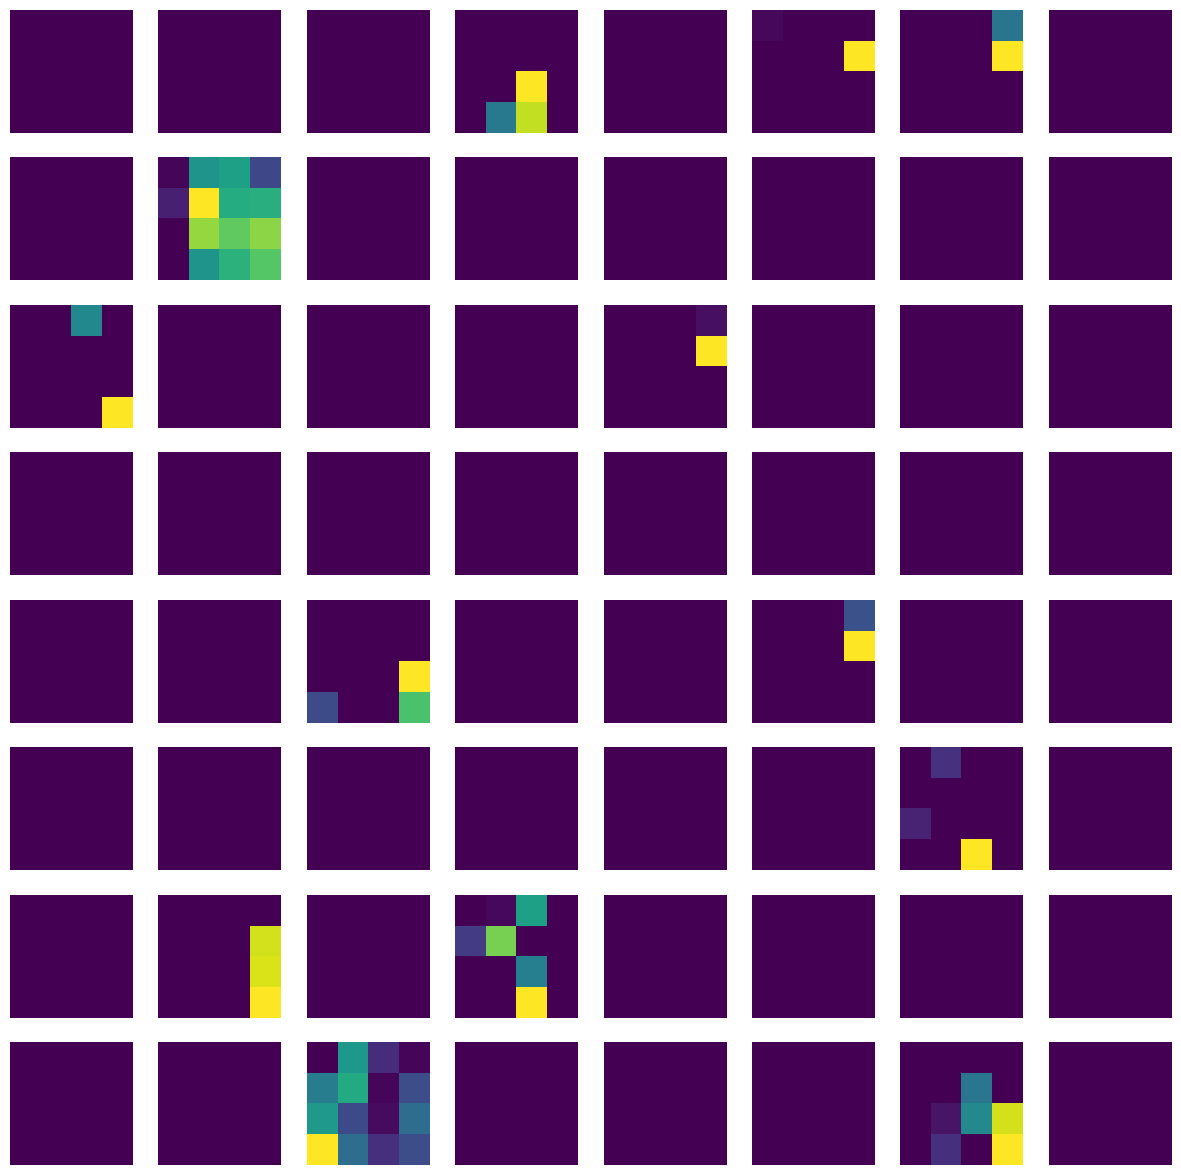

In [11]:

# Visualize feature maps
def visualize_feature_maps(layer_index, image_index):
    activations = activation_model.predict(x_train[image_index].reshape(1, 32, 32, 3))
    activation = activations[layer_index]
    feature_map_count = activation.shape[-1]
    plt.figure(figsize=(15, 15))
    for i in range(feature_map_count):
        plt.subplot(8, 8, i+1)
        plt.imshow(activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()

# Example: Visualize feature maps for the first convolutional layer of the first image
for layer in range(len(layer_outputs)):
    print(f"Visualizing layer {layer + 1}")
    visualize_feature_maps(layer, 5)
